In [78]:
# 1st Analysis - 

In [79]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [80]:
#create read variables
city_data = "./raw_data/city_data.csv"
ride_data = "./raw_data/ride_data.csv"
#load in CSV Files
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
#merge the data fram on city
pyber_complete = pd.merge(city_df, ride_df, how="left", on=["city", "city"])
#output sample
pyber_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [81]:

#Determine the Average Fare ($) Per City
pyber_fare = pyber_complete.groupby(["city"]).mean()["fare"]
print(pyber_fare.head())
#Determine the total numbers of Drivers per City
pyber_drivers = pyber_complete.groupby(["city"]).mean()["driver_count"]
print(pyber_drivers.head())
#Determine the total number of Riders Per city
pyber_rides = pyber_complete.groupby(["city"]).count()["ride_id"]
print(pyber_rides.head())

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64
city
Alvarezhaven    21.0
Alyssaberg      67.0
Anitamouth      16.0
Antoniomouth    21.0
Aprilchester    49.0
Name: driver_count, dtype: float64
city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64


In [82]:
#Convert to data frame
pyber_df = pd.DataFrame({"Average Fares": pyber_fare, "Drivers Per City":pyber_drivers, "Rides Per City": pyber_rides})

pyber_df.reset_index(inplace=True)
pyber_df.head()


,city,Average Fares,Drivers Per City,Rides Per City
0,Alvarezhaven,23.928710,21.0,31
1,Alyssaberg,20.609615,67.0,26
2,Anitamouth,37.315556,16.0,9
3,Antoniomouth,23.625000,21.0,22
4,Aprilchester,21.981579,49.0,19


In [83]:
#merge dataframes to get types
pyber_completed = pd.merge(city_df, pyber_df, how="left", on=["city", "city"])
del pyber_completed["driver_count"]
pyber_completed = pyber_completed.rename(columns = {"city": "City", "type": "Type"})
pyber_completed.head()

,City,Type,Average Fares,Drivers Per City,Rides Per City
0,Kelseyland,Urban,21.806429,63.0,28
1,Nguyenbury,Urban,25.899615,8.0,26
2,East Douglas,Urban,26.169091,12.0,22
3,West Dawnfurt,Urban,22.330345,34.0,29
4,Rodriguezburgh,Urban,21.332609,52.0,23


In [84]:
#set index on city
pyber_data = pyber_completed.set_index('Type')
pyber_data.head()


,City,Average Fares,Drivers Per City,Rides Per City
Type,,,,
Urban,Kelseyland,21.806429,63.0,28
Urban,Nguyenbury,25.899615,8.0,26
Urban,East Douglas,26.169091,12.0,22
Urban,West Dawnfurt,22.330345,34.0,29
Urban,Rodriguezburgh,21.332609,52.0,23


In [99]:
#pyber_data.plot(kind="scatter", x="Drivers Per City", y="Average Fares")
#plt.show()
x = pyber_data["Rides Per City"]
y = pyber_data["Average Fares"]
s = pyber_data["Drivers Per City"]
c = ["Gold", "Blue", "Coral"]
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlim(0,40)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.scatter(x.loc["Rural"], y, s=s*2, c="Gold", alpha=.75, edgecolors = "black", label="Rural")
plt.scatter(x.loc["Suburban"], y, s=s*2, c="Blue", alpha=.75, edgecolors = "black", label="Suburban")
plt.scatter(x.loc["Urban"], y, s=s*2, c="Coral", alpha=0.75, edgecolors = "black", label="Urban")
plt.grid()
plt.legend()
plt.show()


ValueError: x and y must be the same size

In [98]:
x

Type
Urban       28
Urban       26
Urban       22
Urban       29
Urban       23
Urban       24
Urban       18
Urban       23
Urban       26
Urban       28
Urban       21
Urban       27
Urban       29
Urban       22
Urban       25
Urban       32
Urban       31
Urban       27
Urban       26
Urban       27
Urban       20
Urban       27
Urban       28
Urban       28
Urban       31
Urban       31
Urban       23
Urban       22
Urban       34
Urban       24
            ..
Suburban    13
Suburban    18
Suburban    18
Suburban    19
Suburban    64
Suburban    15
Suburban    15
Suburban    16
Suburban    12
Suburban    10
Suburban     9
Suburban    17
Rural        5
Rural        7
Rural        6
Rural        4
Rural        8
Rural        6
Rural        6
Rural        4
Rural       10
Rural       12
Rural        1
Rural        5
Rural       10
Rural       10
Rural       11
Rural        9
Rural        4
Rural        7
Name: Rides Per City, Length: 126, dtype: int64

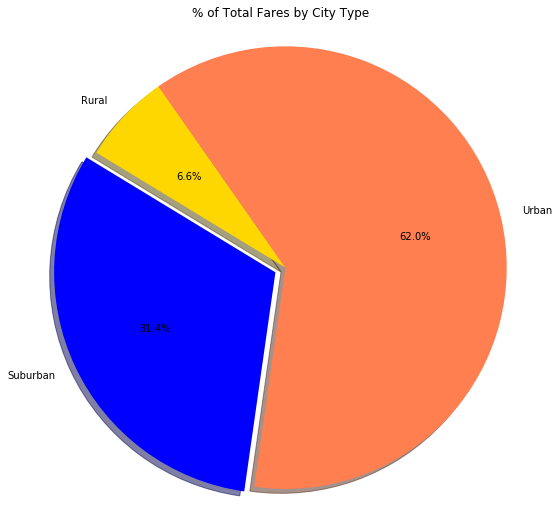

In [94]:
#% of Total Fares by City Type
explode = (0, 0.05, 0)
colors = ["Gold", "Blue", "Coral"]
plt.title("% of Total Fares by City Type")
type_fare = pyber_complete.groupby(["type"]).sum()["fare"]
fare_pie = type_fare.plot(kind="pie", startangle = 125,shadow = True, figsize = (9,9), autopct="%1.1f%%", explode=explode, colors=colors)
fare_pie.set_ylabel("")
plt.axis("equal")
plt.show()

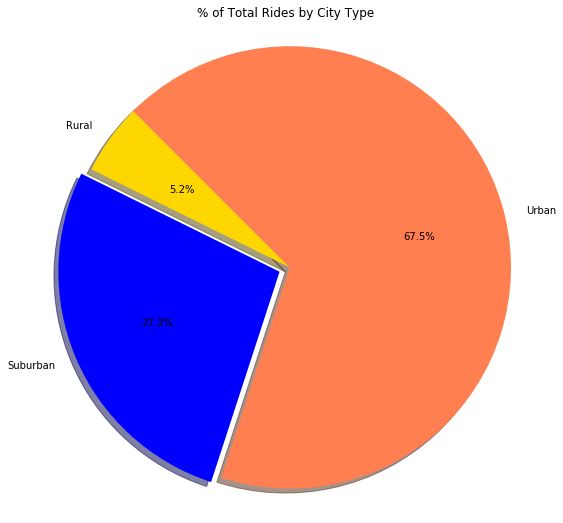

In [76]:
#% of Total Rides By City Type
ride_fare = pyber_complete.groupby(["type"]).count()["ride_id"]
fare_pie = ride_fare.plot(kind="pie", startangle = 135,shadow = True, figsize = (9,9), autopct="%1.1f%%", explode=explode, colors=colors)
fare_pie.set_ylabel("")
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

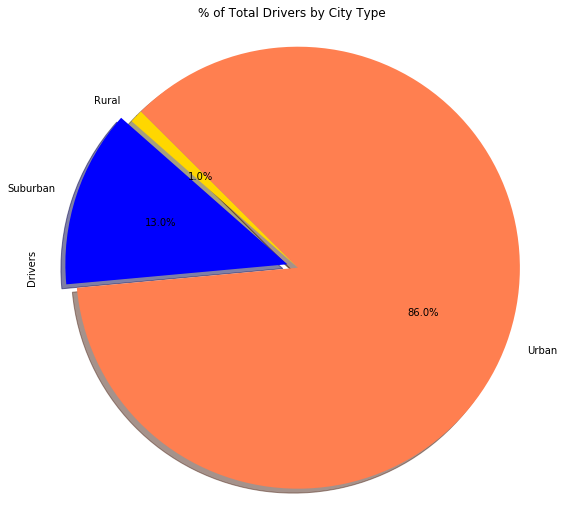

In [77]:
# Total Drivers by City Type
driver_pie = pyber_complete.groupby(["type"]).sum()["driver_count"]
driver_pie = driver_pie.plot(kind="pie", startangle = 135,shadow = True, figsize = (9,9), autopct="%1.1f%%", explode=explode, colors=colors)
driver_pie.set_ylabel("Drivers")
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()